# Grüneisen Workflow (VASP)

This part is mocking the VASP calculation to facilitate the execution in the notebook.


In [1]:
import warnings

from mock_vasp import TEST_DIR, mock_vasp

ref_paths = {
    "tight relax 1": "Si_gruneisen_tutorial/tight_relax_1_0",
    "tight relax 2": "Si_gruneisen_tutorial/tight_relax_2_1",
    "tight relax 1 plus": "Si_gruneisen_tutorial/tight_relax_1_plus_3",
    "tight relax 2 plus": "Si_gruneisen_tutorial/tight_relax_2_plus_5",
    "tight relax 1 minus": "Si_gruneisen_tutorial/tight_relax_1_minus_4",
    "tight relax 2 minus": "Si_gruneisen_tutorial/tight_relax_2_minus_6",
    "dft phonon static 1/1 ground": "Si_gruneisen_tutorial/dft_phonon_static_1_1_ground_24",
    "dft phonon static 1/1 plus": "Si_gruneisen_tutorial/dft_phonon_static_1_1_plus_26",
    "dft phonon static 1/1 minus": "Si_gruneisen_tutorial/dft_phonon_static_1_1_minus_28",
}

/home/jgeorge/miniconda3/envs/Fix_Gruneisentutorial/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's load all required Makers to set up the calculation settings for VASP.

In [2]:
from atomate2.vasp.flows.core import DoubleRelaxMaker
from atomate2.vasp.jobs.core import TightRelaxMaker
from atomate2.vasp.jobs.phonons import PhononDisplacementMaker
from atomate2.vasp.sets.core import StaticSetGenerator, TightRelaxSetGenerator

In [3]:
from jobflow import JobStore, run_locally
from maggma.stores import MemoryStore
from pymatgen.core import Structure

from atomate2.vasp.flows.gruneisen import GruneisenMaker, PhononMaker

warnings.filterwarnings("ignore")

job_store = JobStore(
    MemoryStore(),
    additional_stores={"data": MemoryStore()},
)
si_structure = Structure.from_file(TEST_DIR / "structures" / "Si_diamond.cif")

In [4]:
phonon_displacement_maker = PhononDisplacementMaker(
    name="dft phonon static",
    run_vasp_kwargs={"handlers": ()},
    input_set_generator=StaticSetGenerator(
        user_incar_settings={
            "GGA": "PE",
            "IBRION": -1,
            "ISPIN": 1,
            "ISMEAR": 0,
            "ISIF": 3,
            "ENCUT": 700,
            "EDIFF": 1e-7,
            "LAECHG": False,
            "LREAL": False,
            "ALGO": "Normal",
            "NSW": 0,
            "LCHARG": False,
            "LWAVE": False,
            "LVTOT": False,
            "LORBIT": None,
            "LOPTICS": False,
            "SIGMA": 0.05,
            "ISYM": 0,
            "KSPACING": 0.1,
            "NPAR": 4,
        },
        auto_ispin=False,
    ),
)

In [6]:
phonon_bulk_relax_maker_isif3 = DoubleRelaxMaker.from_relax_maker(
    TightRelaxMaker(
        run_vasp_kwargs={"handlers": ()},
        input_set_generator=TightRelaxSetGenerator(
            user_incar_settings={
                "GGA": "PE",
                "ISPIN": 1,
                "KSPACING": 0.1,
                # "EDIFFG": 1e-5,
                "ALGO": "Normal",
                "LAECHG": False,
                "ISMEAR": 0,
                "ENCUT": 700,
                "IBRION": 1,
                "ISYM": 0,
                "SIGMA": 0.05,
                "LCHARG": False,
                "LWAVE": False,
                "LVTOT": False,
                "LORBIT": None,
                "LOPTICS": False,
                "LREAL": False,
                "ISIF": 3,
                "NPAR": 4,
            }
        ),
    )
)

In [5]:
phonon_bulk_relax_maker_isif4 = DoubleRelaxMaker.from_relax_maker(
    TightRelaxMaker(
        run_vasp_kwargs={"handlers": ()},
        input_set_generator=TightRelaxSetGenerator(
            user_incar_settings={
                "GGA": "PE",
                "ISPIN": 1,
                "KSPACING": 0.1,
                # "EDIFFG": 1e-5,
                "ALGO": "Normal",
                "LAECHG": False,
                "ISMEAR": 0,
                "ENCUT": 700,
                "IBRION": 1,
                "ISYM": 0,
                "SIGMA": 0.05,
                "LCHARG": False,
                "LWAVE": False,
                "LVTOT": False,
                "LORBIT": None,
                "LOPTICS": False,
                "LREAL": False,
                "ISIF": 4,
                "NPAR": 4,
            }
        ),
    )
)

Then one can use the `GruneisenMaker` to generate a `Flow`.

In [7]:
flow = GruneisenMaker(
    symprec=1e-4,
    bulk_relax_maker=phonon_bulk_relax_maker_isif3,
    const_vol_relax_maker=phonon_bulk_relax_maker_isif4,
    phonon_maker=PhononMaker(
        generate_frequencies_eigenvectors_kwargs={
            "tmin": 0,
            "tmax": 1000,
            "tstep": 10,
        },
        min_length=10,
        bulk_relax_maker=None,
        born_maker=None,
        static_energy_maker=None,
        phonon_displacement_maker=phonon_displacement_maker,
    ),
).make(structure=si_structure)

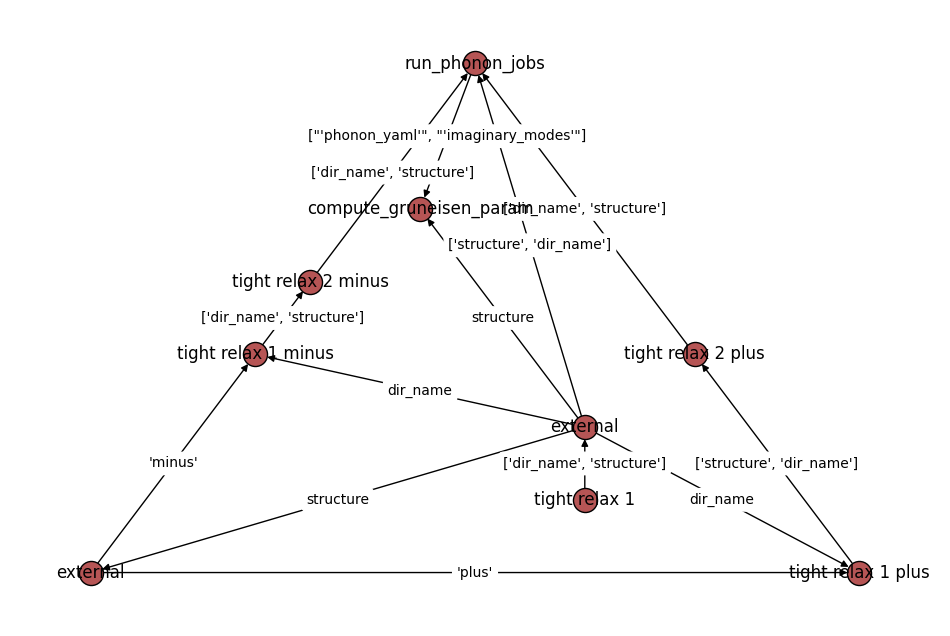

In [8]:
flow.draw_graph().show()

We can then run the code with "mock_vasp".

In [9]:
with mock_vasp(ref_paths=ref_paths) as mf:
    run_locally(
        flow,
        create_folders=True,
        ensure_success=True,
        raise_immediately=True,
        store=job_store,
    )

2025-03-16 12:32:16,324 INFO Started executing jobs locally
2025-03-16 12:32:16,330 INFO Starting job - tight relax 1 (823a020d-d75f-4999-a21d-2da4a317c38f)


Error in parsing bandstructure
VASP doesn't properly output efermi for IBRION == 1


2025-03-16 12:32:17,576 INFO Finished job - tight relax 1 (823a020d-d75f-4999-a21d-2da4a317c38f)
2025-03-16 12:32:17,577 WARNING Response.stored_data is not supported with local manager.
2025-03-16 12:32:17,577 INFO Starting job - tight relax 2 (b8069a9b-1d4c-4e0a-94aa-79a3760f9ccd)


Error in parsing bandstructure
VASP doesn't properly output efermi for IBRION == 1


2025-03-16 12:32:19,002 INFO Finished job - tight relax 2 (b8069a9b-1d4c-4e0a-94aa-79a3760f9ccd)
2025-03-16 12:32:19,003 WARNING Response.stored_data is not supported with local manager.
2025-03-16 12:32:19,004 INFO Starting job - shrink_expand_structure (b3c58f34-8f02-431e-811c-8ddd5f71489d)
2025-03-16 12:32:19,021 INFO Finished job - shrink_expand_structure (b3c58f34-8f02-431e-811c-8ddd5f71489d)
2025-03-16 12:32:19,022 INFO Starting job - tight relax 1 plus (a0a0ef6d-eb02-4b6c-a526-db3e2604a7e0)
2025-03-16 12:32:19,705 INFO Finished job - tight relax 1 plus (a0a0ef6d-eb02-4b6c-a526-db3e2604a7e0)
2025-03-16 12:32:19,705 WARNING Response.stored_data is not supported with local manager.
2025-03-16 12:32:19,706 INFO Starting job - tight relax 1 minus (38f0d20f-ce0a-4289-a963-31d8111f1b66)
2025-03-16 12:32:20,252 INFO Finished job - tight relax 1 minus (38f0d20f-ce0a-4289-a963-31d8111f1b66)
2025-03-16 12:32:20,253 WARNING Response.stored_data is not supported with local manager.
2025-03-1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2025-03-16 12:32:30,328 INFO Finished job - generate_frequencies_eigenvectors ground (204e4e31-f4d4-4105-94fb-cb5a09998f01)
2025-03-16 12:32:30,329 INFO Starting job - get_supercell_size plus (3d3abbef-3559-4f21-a6a9-14d89aafc8d6)
2025-03-16 12:32:30,335 INFO Finished job - get_supercell_size plus (3d3abbef-3559-4f21-a6a9-14d89aafc8d6)
2025-03-16 12:32:30,336 INFO Starting job - generate_phonon_displacements plus (b8eb3307-bd9a-4d06-8b9c-362951a092ca)
2025-03-16 12:32:30,522 INFO Finished job - generate_phonon_displacements plus (b8eb3307-bd9a-4d06-8b9c-362951a092ca)
2025-03-16 12:32:30,523 INFO Starting job - run_phonon_displacements plus (12d16ec2-b1df-48b2-8d2d-5b2323011638)
2025-03-16 12:32:30,622 INFO Finished job - run_phonon_displacements plus (12d16ec2-b1df-48b2-8d2d-5b2323011638)
2025-03-16 12:32:30,630 INFO Starting job - dft phonon static 1/1 plus (d8c40f31-16a1-49ea-b047-1aef2ee37846)
2025-03-16 12:32:31,447 INFO Finished job - dft phonon static 1/1 plus (d8c40f31-16a1-49ea

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2025-03-16 12:32:39,521 INFO Finished job - generate_frequencies_eigenvectors plus (986ebfe2-0bdd-4028-964e-2515b4e45736)
2025-03-16 12:32:39,522 INFO Starting job - get_supercell_size minus (754f99cf-01f1-40f6-86f4-c4708d09aee1)
2025-03-16 12:32:39,527 INFO Finished job - get_supercell_size minus (754f99cf-01f1-40f6-86f4-c4708d09aee1)
2025-03-16 12:32:39,528 INFO Starting job - generate_phonon_displacements minus (4f4221ad-f7b6-42db-a461-47f2bb92ae1e)
2025-03-16 12:32:39,743 INFO Finished job - generate_phonon_displacements minus (4f4221ad-f7b6-42db-a461-47f2bb92ae1e)
2025-03-16 12:32:39,744 INFO Starting job - run_phonon_displacements minus (5b8eca20-c58b-426c-b2ec-5f3353e5cdf1)
2025-03-16 12:32:39,843 INFO Finished job - run_phonon_displacements minus (5b8eca20-c58b-426c-b2ec-5f3353e5cdf1)
2025-03-16 12:32:39,852 INFO Starting job - dft phonon static 1/1 minus (9c256594-6a25-48a9-be62-0027122415a8)
2025-03-16 12:32:40,730 INFO Finished job - dft phonon static 1/1 minus (9c256594-6a2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2025-03-16 12:32:50,991 INFO Finished job - generate_frequencies_eigenvectors minus (3b9ab9e8-76f0-4ac7-a785-213fd0ef8a55)
2025-03-16 12:32:50,992 INFO Starting job - compute_gruneisen_param (0d02505b-690e-4538-9435-4a76510ff79d)
2025-03-16 12:33:11,959 INFO Finished job - compute_gruneisen_param (0d02505b-690e-4538-9435-4a76510ff79d)
2025-03-16 12:33:11,960 INFO Finished executing jobs locally


Let's then analyze outputs from the workflow.

In [10]:
job_store.connect()

result = job_store.query_one(
    {"name": "compute_gruneisen_param"},
    properties=[
        "output.gruneisen_band_structure",
        "output.gruneisen_parameter",
    ],
    load=True,
    sort={"completed_at": -1},  # to get the latest computation
)

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='Frequencies (THz)'>

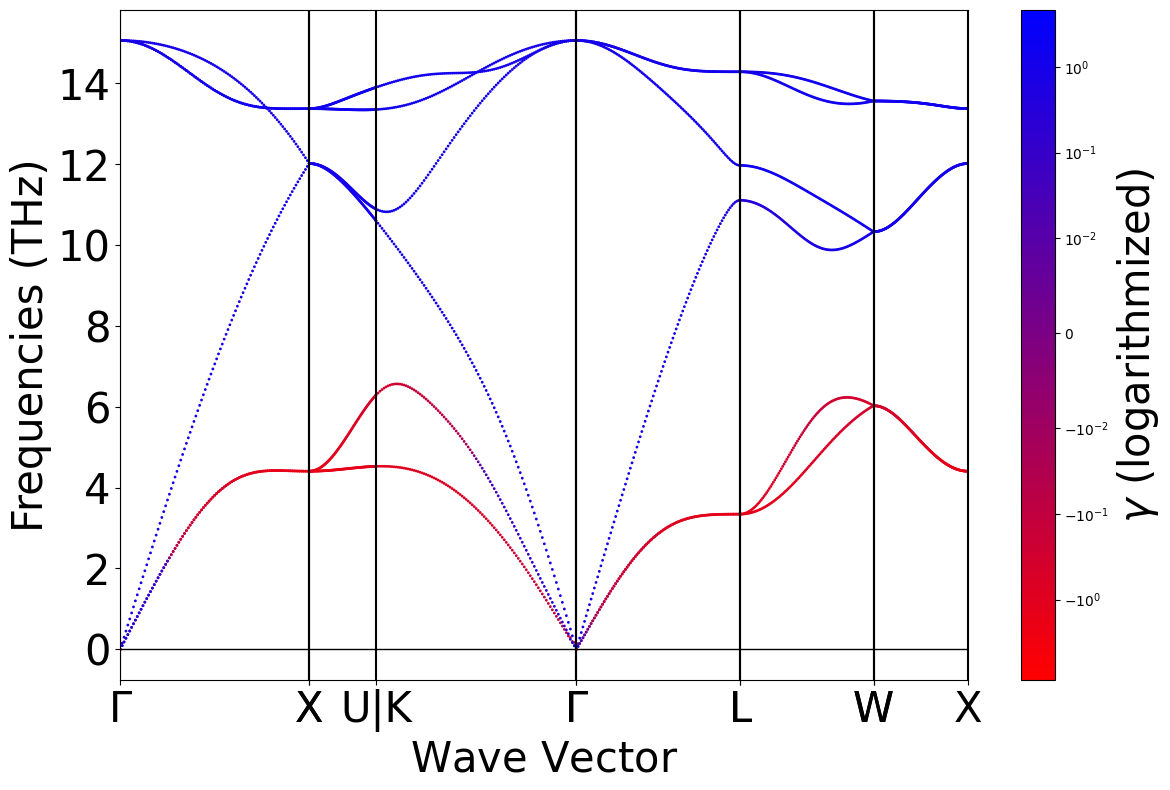

In [11]:
from pymatgen.phonon.gruneisen import GruneisenPhononBandStructureSymmLine
from pymatgen.phonon.plotter import GruneisenPhononBSPlotter

bs = GruneisenPhononBandStructureSymmLine.from_dict(
    result["output"]["gruneisen_band_structure"]
)
plt = GruneisenPhononBSPlotter(bs=bs)
plt.get_plot_gs(plot_ph_bs_with_gruneisen=True)